# Farbvergleich in Bildern

Dieses Notebook zeigt zwei Methoden zur Berechnung der Farbähnlichkeit zwischen Bildern:

1. Histogramm-Vergleich im HSV-Farbraum
2. Vergleich dominanter Farben mittels K-Means-Clustering

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans (import dauert zu lange)
from pathlib import Path

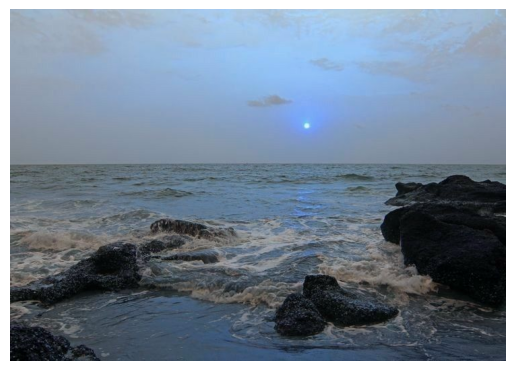

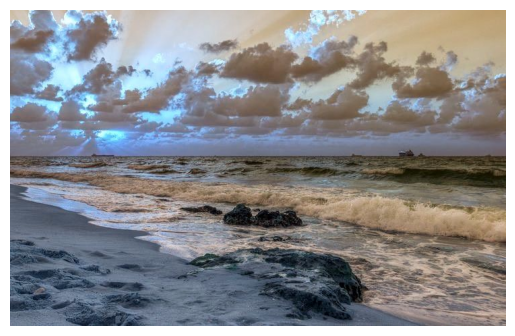

In [3]:
# Bilder laden
bild1 = cv2.imread('Bilder/strand1.jpg') 
bild2 = cv2.imread('Bilder/strand2.jpg')

# Bider von BGR nach RGB umwandeln
# bild1 = cv2.cvtColor(bild1, cv2.COLOR_BGR2RGB)
# bild2 = cv2.cvtColor(bild2, cv2.COLOR_BGR2RGB)

# Bilder anzeigen
plt.imshow(bild1)
plt.axis('off')
plt.show()

plt.imshow(bild2)
plt.axis('off')
plt.show()

Methode 1: Histogrammvergleich

- Konvertieren der Bilder in den HSV-Farbraum
- Berechnung eines Farb-Histogramms
- Vergleich der Histogramme mit der Korrelationsmethode (cv2.HISTCMP_CORREL)

In [ ]:
# Histogrammvergleich
def color_histogram_similarity(bild1, bild2):
    """
    Computes the similarity between two images based on their color histograms.
    Args:
        pic1 (str), pic2 (str)
    Returns:
        float: Similarity score between 0 and 1 (1 = identical).
    """
    hsv1 = cv2.cvtColor(bild1, cv2.COLOR_BGR2HSV)
    hsv2 = cv2.cvtColor(bild2, cv2.COLOR_BGR2HSV)
    
    # Calculate the color histograms
    hist1 = cv2.calcHist([hsv1], [0, 1], None, [50, 60], [0, 180, 0, 256])
    hist2 = cv2.calcHist([hsv2], [0, 1], None, [50, 60], [0, 180, 0, 256])

    # Normalize the histograms
    hist1 = cv2.normalize(hist1, hist1)
    hist2 = cv2.normalize(hist2, hist2)

    # Plot the histograms
    plt.subplot(1, 2, 1)
    plt.plot(hist1)
    plt.title('Histogram 1')
    plt.subplot(1, 2, 2)
    plt.plot(hist2)
    plt.title('Histogram 2')
    plt.show()

# Heatmap
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(hist1, interpolation='nearest', aspect='auto')
    plt.title("Histogramm Bild 1")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(hist2, interpolation='nearest', aspect='auto')
    plt.title("Histogramm Bild 2")
    plt.axis('off')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.show()

    # Compute the correlation between the two histograms
    similarity = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    if cv2.HISTCMP_CORREL == cv2.HISTCMP_INTERSECT:
        similarity = similarity / hist1.sum()


    return max(0.0, min(1.0, similarity))

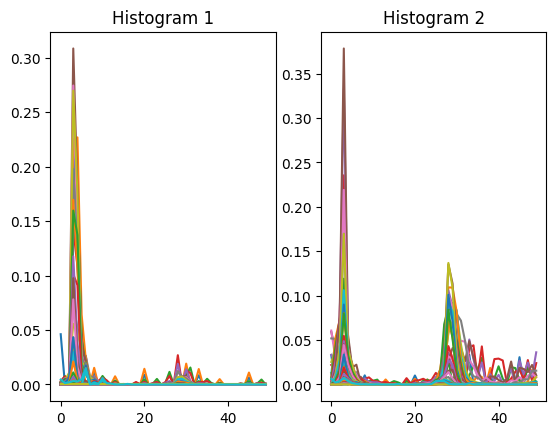

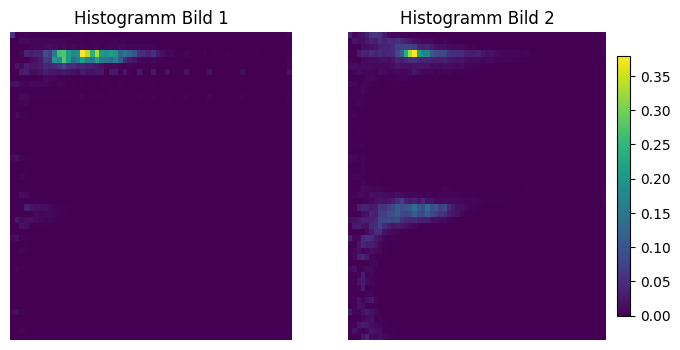

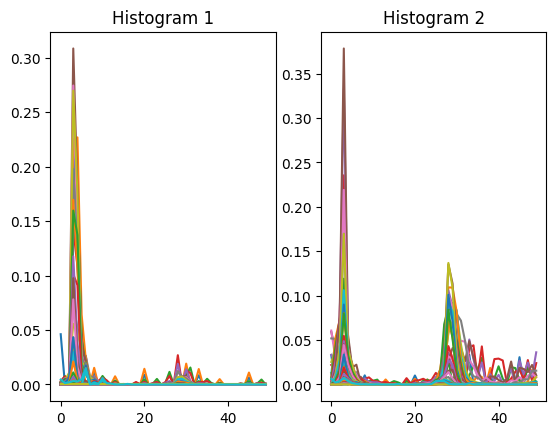

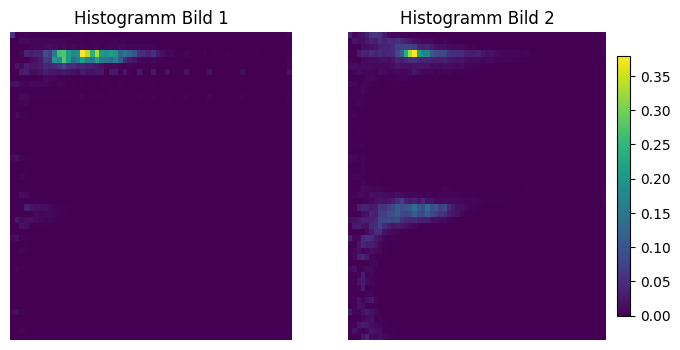

Correlation-Score: 0.5916000690145397
Intersection-Score: 0.5916000690145397


In [21]:
similarity_cor = color_histogram_similarity(bild1, bild2)
similarity_int = color_histogram_similarity(bild1, bild2)
print("Correlation-Score:", similarity_cor)
print("Intersection-Score:", similarity_int)




#print("Ähnlichkeit der Bilder basierend auf dem Histogramm:", color_histogram_similarity(bild1, bild2))

Methode 2: Dominante Farben via K-Means

- Extrahieren der 3 häufigsten Farben pro Bild
- Vergleich der Farbzentren durch euklidische Distanz
- Ziel: eine kleinere Distanz bedeutet größere Farbähnlichkeit

In [6]:
# K-means clustering
def get_dominant_colors(image, k=3):
    """
    Findet die k dominanten Farben in einem Bild mittels KMeans Clustering.
    """
    # Bild auf eine Zeile aus Pixeln bringen
    img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    img_data = img.reshape((-1, 3))
    
    # KMeans Clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(img_data)
    
    # Dominante Farben (Clusterzentren)
    colors = kmeans.cluster_centers_
    return colors

def compare_dominant_colors(colors1, colors2):
    """
    Vergleicht zwei Listen dominanter Farben (Mittelwert der euklidischen Distanzen).
    """
    colors1 = np.sort(colors1, axis=0)
    colors2 = np.sort(colors2, axis=0)
    distance = np.linalg.norm(colors1 - colors2)
    return distance

# Beispiel: Anwendung
colors_img1 = get_dominant_colors(bild1)
colors_img2 = get_dominant_colors(bild2)
kmeans_similarity = compare_dominant_colors(colors_img1, colors_img2)

print(f"K-Means Farb-Distanz: {kmeans_similarity:.2f}")

NameError: name 'KMeans' is not defined

In [ ]:
# Farbpaletten plotten